In [5]:
!pip install face_recognition

### HOG features

In [6]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

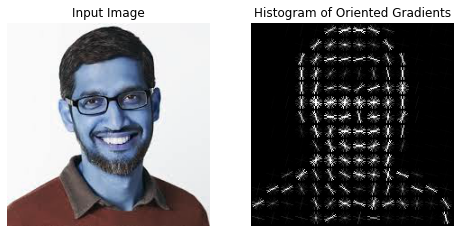

In [49]:
# read image from the disk
from skimage import io

image = io.imread('pichai.jpg')
#image = cv2.imread(r'\var\clooney.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# fd is the feature descriptor, used to represent the image
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), 
                    cells_per_block=(1,1), visualize=True, multichannel=True)

# plot input and hog image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input Image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [50]:
len(fd)

1568

In [51]:
image.shape

(225, 225, 3)

# Face Detection

In [52]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2 #OpeCV
%matplotlib inline

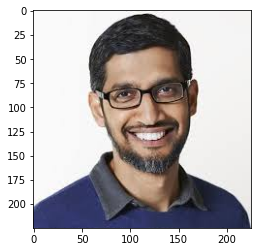

In [53]:
# Load the jpg file into a numpy array
image = cv2.imread('pichai.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [54]:
# fid all the faces i the image
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 1 face(s) in input image.


A face is located at pixel location Top: 67, Left: 56, Bottom: 175, Right: 163


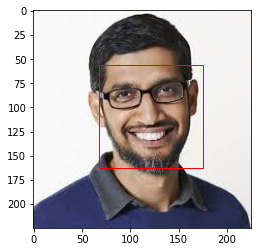

In [55]:
# get axis handle
plt.imshow(image)
ax = plt.gca()

# repeat for all faces found
for face_location in face_locations:
    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    x,y,w,h = left, top, right, bottom
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))

    # Let's draw a box around the face
    rect = Rectangle((x,y), w-x, h-y, fill=False, color = 'red')
    ax.add_patch(rect)

# show output image
plt.show()

# Face Recognition

In [56]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [57]:
# Load the known images(create a database)
image = cv2.imread('modi.jpg')
modi = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('shahrukh.jpg')
shahrukh = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('pichai.jpg')
pichai = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [58]:
# Get the face encoding of each person. This can fail if no one is found in the photo.
modi_encoding = face_recognition.face_encodings(modi)[0]
shahrukh_encoding = face_recognition.face_encodings(shahrukh)[0]
pichai_encoding = face_recognition.face_encodings(pichai)[0]

# Create a dataase of all known face encodings
known_face_encodings = [
                       modi_encoding,
                        shahrukh_encoding,
                        pichai_encoding
]

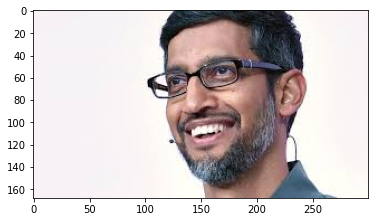

In [59]:
# load the image that we want to check
image = cv2.imread('pichai_11.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [60]:
from scipy.spatial import distance
# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
    # Test if this unknown encoding matches any of the three people we know
    # compute euclidean distance
    results = []
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold

    name = "Unknown"

    if results[0]:
        name = "Narendra Damodardas Modi"
    elif results[1]:
        name = "Shahrukh Khan"
    elif results[2]:
        name = "Sundar Pichai"

    print(f"Found {name} in the photo!")
    

Found Sundar Pichai in the photo!


# Facial Landmarks

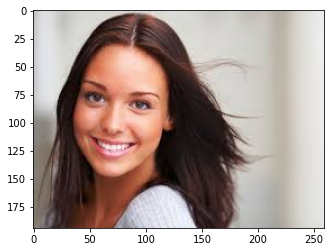

In [70]:
# Load the jpg file into a numpy array
image = cv2.imread('woman.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [71]:
face_landmarks_list = face_recognition.face_landmarks(image)

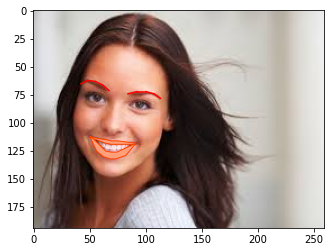

In [72]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
    left_eyebrow_pts = face_landmarks['left_eyebrow']
    pre_x, pre_y = left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
        l = mlines.Line2D([pre_x,x], [pre_y, y], color='red')
        ax.add_line(l)
        pre_x, pre_y = x,y

    right_eyebrow_pts = face_landmarks['right_eyebrow']
    pre_x, pre_y = right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
        l = mlines.Line2D([pre_x,x], [pre_y, y], color='red')
        ax.add_line(l)
        pre_x, pre_y = x,y

    p = Polygon(face_landmarks['top_lip'], facecolor = 'lightsalmon', edgecolor = 'orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor = 'lightsalmon', edgecolor = 'orangered')
    ax.add_patch(p)

# Show final image
plt.show()


    
